In [ ]:
# !pip install squarify

In [ ]:
# !pip install pygal

In [ ]:
# !pip install CairoSVG

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import pygal 
from pygal.style import Style

In [2]:
# toxic_train = pd.read_csv("https://www.dropbox.com/s/8nqzj2glur4xyw1/toxic_train.csv?dl=1")
# toxic_test = pd.read_csv("https://www.dropbox.com/s/9wgt22a8vfdf1a5/toxic_test.csv?dl=1")

toxic_train = pd.read_csv("datasets/toxic_train.csv")
toxic_test = pd.read_csv("datasets/toxic_test.csv")

## EDA

In [3]:
toxic_train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [4]:
toxic_test.head()

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


In [5]:
toxic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [6]:
toxic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97320 entries, 0 to 97319
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            97320 non-null  int64 
 1   comment_text  97320 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [7]:
# check for null values

toxic_train.isnull().sum()

id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

In [8]:
# check for null values

toxic_test.isnull().sum()

id              0
comment_text    0
dtype: int64

**Target Feature**

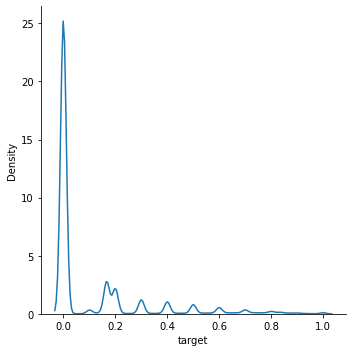

In [9]:
# Plot target feature distribution

sns.displot(toxic_train['target'], kind="kde")
plt.show()

# Most comments are non-toxic (< 0.5)

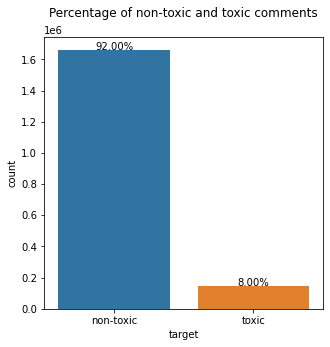

In [10]:
# If toxicity rating < 0.5 then the comment is non-toxic else it is toxic.
# Get toxic and non-toxic comments.
temp = toxic_train['target'].apply(lambda x: "non-toxic" if x < 0.5 else "toxic")

# Plot the number and percentage of toxic and non-toxic comments.
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(temp))

# Plot the count plot.
cntplot = sns.countplot(x=temp)
cntplot.set_title('Percentage of non-toxic and toxic comments', pad=20)

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

# dataset appears imbalanced with more non-toxic than toxic (can be dealt by undersampling / oversampling / SMOTE)

**Toxic Comments Per Identity**

In [11]:
identities = ['male','female','transgender','other_gender','heterosexual','homosexual_gay_or_lesbian',
              'bisexual','other_sexual_orientation','christian','jewish','muslim','hindu','buddhist',
              'atheist','other_religion','black','white','asian','latino','other_race_or_ethnicity',
              'physical_disability','intellectual_or_learning_disability','psychiatric_or_mental_illness',
              'other_disability']

In [12]:
toxic_labeled_df = toxic_train.loc[:, ['target'] + identities ].dropna()

# if score > 0.5, can consider as toxic

toxic_df = toxic_labeled_df[toxic_labeled_df['target'] >= .5][identities]
non_toxic_df = toxic_labeled_df[toxic_labeled_df['target'] < .5][identities]

In [13]:
# at first, we just want to consider the identity tags in binary format. So if the tag is any value other than 0 we consider it as 1.

toxic_count = toxic_df.where(toxic_labeled_df == 0, other = 1).sum()
non_toxic_count = non_toxic_df.where(toxic_labeled_df == 0, other = 1).sum()

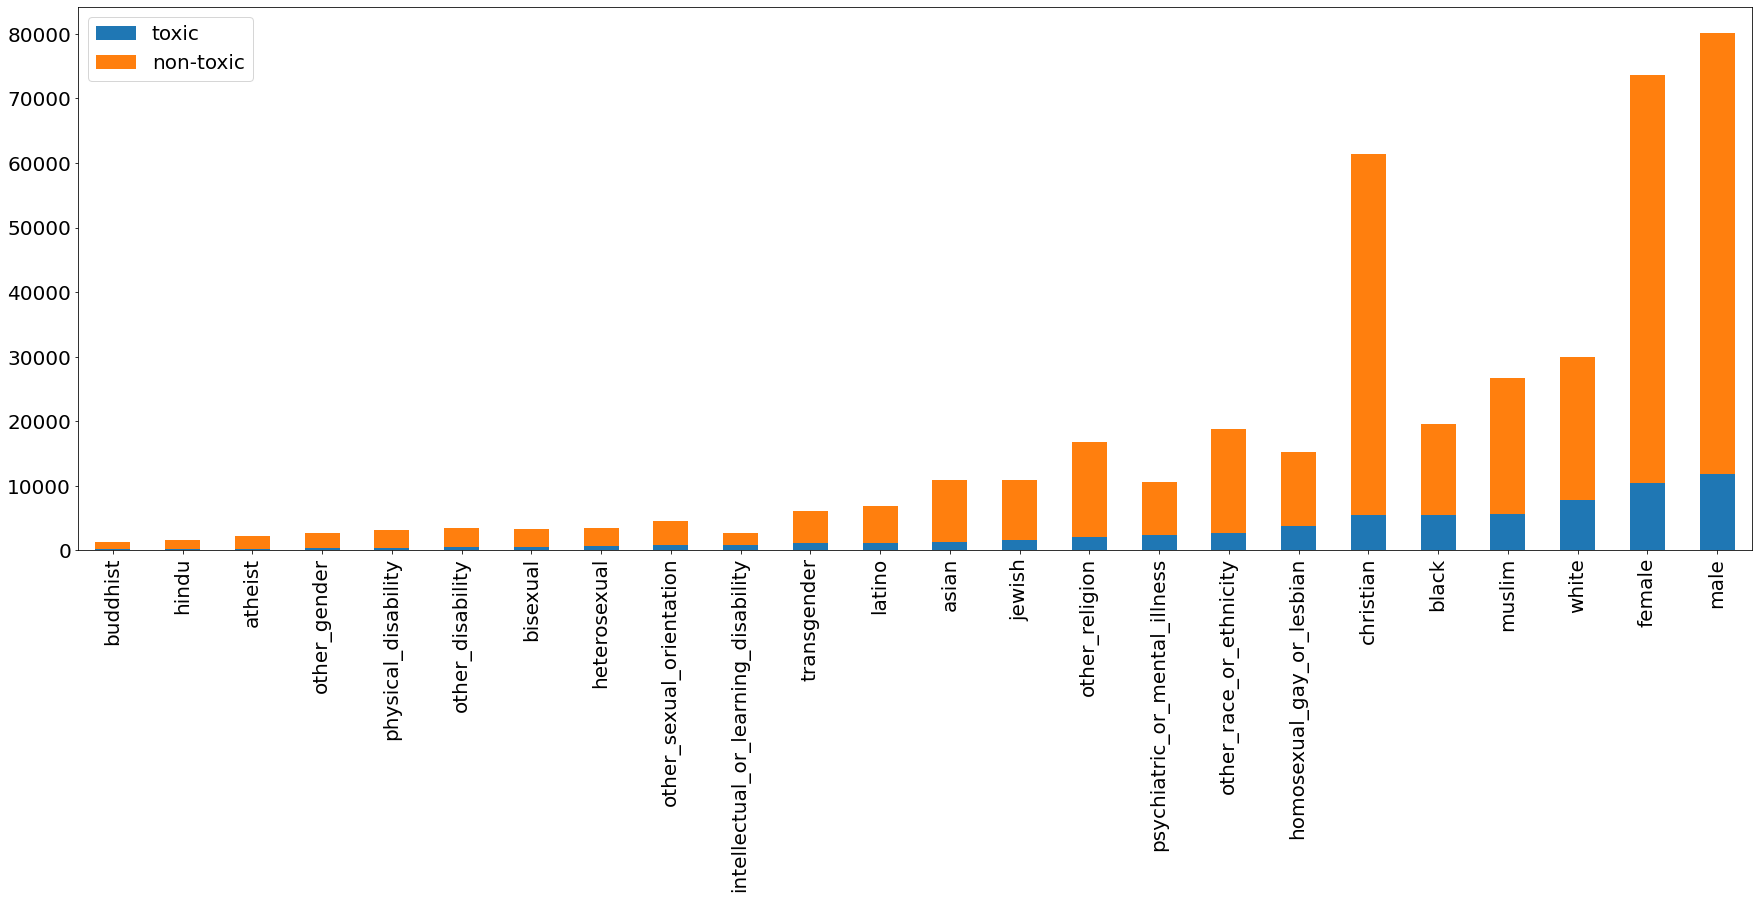

In [14]:
# now we can concat the two series together to get a toxic count vs non toxic count for each identity

toxic_vs_non_toxic = pd.concat([toxic_count, non_toxic_count], axis=1)
toxic_vs_non_toxic = toxic_vs_non_toxic.rename(index=str, columns={1: "non-toxic", 0: "toxic"})
# here we plot the stacked graph but we sort it by toxic comments to (perhaps) see something interesting
toxic_vs_non_toxic.sort_values(by='toxic').plot(kind='bar', stacked=True, figsize=(30,10), fontsize=20).legend(prop={'size': 20})
plt.show()

**Correlation of Identities
(Identify if comments were about one group or just one identity)**

For Toxic Comments

In [15]:
toxic_df.corr()["male"].sort_values(ascending = False)

male                                   1.000000
female                                 0.251032
white                                  0.093315
heterosexual                           0.079224
homosexual_gay_or_lesbian              0.047570
transgender                            0.032546
black                                  0.022581
bisexual                               0.016136
other_sexual_orientation               0.011243
physical_disability                    0.009453
other_disability                       0.003717
other_gender                          -0.000985
hindu                                 -0.006054
intellectual_or_learning_disability   -0.008745
atheist                               -0.009451
latino                                -0.012586
buddhist                              -0.016511
other_religion                        -0.020685
other_race_or_ethnicity               -0.021788
christian                             -0.024229
psychiatric_or_mental_illness         -0

In [16]:
toxic_df.corr()["homosexual_gay_or_lesbian"].sort_values(ascending = False)

homosexual_gay_or_lesbian              1.000000
heterosexual                           0.234602
bisexual                               0.168542
transgender                            0.130152
other_sexual_orientation               0.111654
christian                              0.096497
other_gender                           0.055825
male                                   0.047570
other_religion                         0.031171
female                                 0.020832
jewish                                 0.016437
atheist                                0.006786
muslim                                 0.006350
hindu                                  0.005961
physical_disability                    0.005284
latino                                 0.003951
buddhist                               0.002545
other_disability                       0.002321
other_race_or_ethnicity               -0.010379
asian                                 -0.019550
intellectual_or_learning_disability   -0

For Non-toxic comments

In [17]:
non_toxic_df.corr()["male"].sort_values(ascending = False)

male                                   1.000000
female                                 0.337290
white                                  0.092776
heterosexual                           0.056103
black                                  0.039830
homosexual_gay_or_lesbian              0.036298
transgender                            0.029125
other_sexual_orientation               0.013915
physical_disability                    0.013626
bisexual                               0.009494
other_disability                       0.009084
other_gender                           0.001246
intellectual_or_learning_disability   -0.001594
buddhist                              -0.003866
latino                                -0.005227
christian                             -0.005297
hindu                                 -0.006675
psychiatric_or_mental_illness         -0.008079
other_race_or_ethnicity               -0.009748
atheist                               -0.010326
other_religion                        -0

In [18]:
non_toxic_df.corr()["homosexual_gay_or_lesbian"].sort_values(ascending = False)

homosexual_gay_or_lesbian              1.000000
bisexual                               0.237183
heterosexual                           0.223105
transgender                            0.131330
other_sexual_orientation               0.109869
christian                              0.066678
other_gender                           0.041458
male                                   0.036298
female                                 0.028639
other_religion                         0.023343
jewish                                 0.017682
black                                  0.015399
muslim                                 0.012675
atheist                                0.008477
latino                                 0.005139
buddhist                               0.004921
other_disability                       0.004827
physical_disability                    0.004636
intellectual_or_learning_disability    0.001164
hindu                                  0.000771
other_race_or_ethnicity               -0

**Word Clouds**

In [19]:
# !pip install wordcloud

In [20]:
# import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [21]:
stpwrds = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stpwrds,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

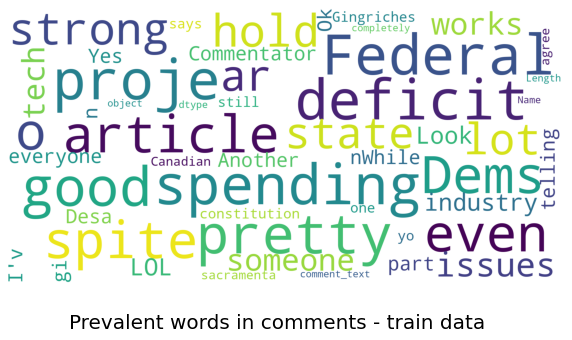

In [22]:
show_wordcloud(toxic_train['comment_text'].sample(20000), title = 'Prevalent words in comments - train data')

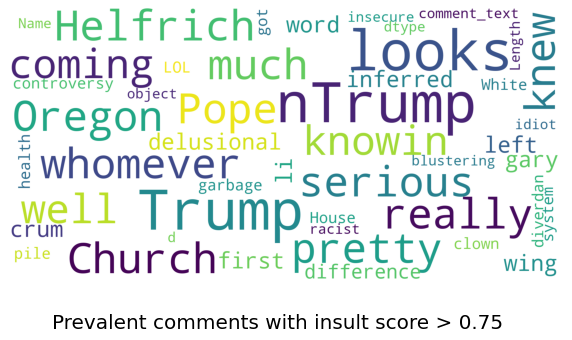

In [23]:
show_wordcloud(toxic_train.loc[toxic_train['insult'] > 0.75]['comment_text'].sample(20000), 
               title = 'Prevalent comments with insult score > 0.75')

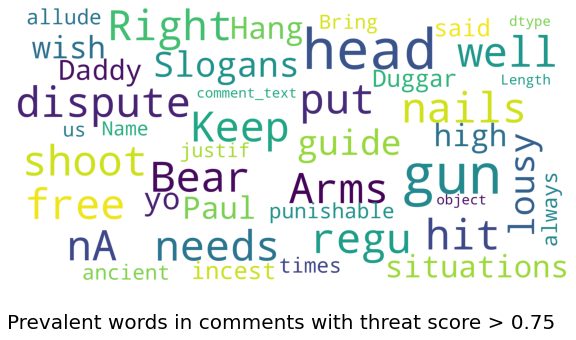

In [24]:
show_wordcloud(toxic_train.loc[toxic_train['threat'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with threat score > 0.75')

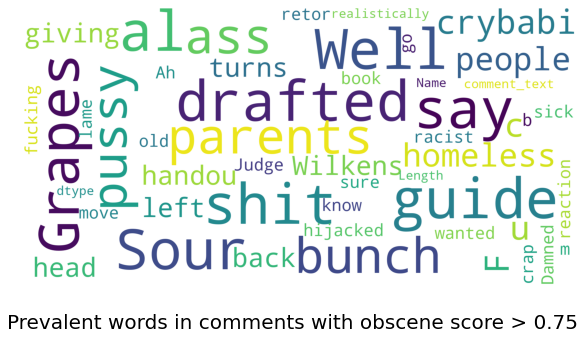

In [25]:
show_wordcloud(toxic_train.loc[toxic_train['obscene'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with obscene score > 0.75')

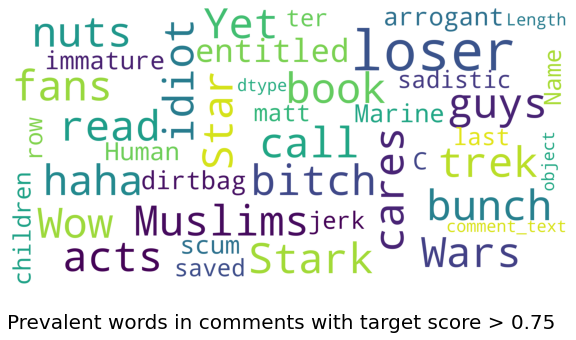

In [26]:
show_wordcloud(toxic_train.loc[toxic_train['target'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with target score > 0.75')

In [27]:
toxic_train.loc[(toxic_train['male'] > 0.5) & (toxic_train['target'] > 0.75)]["comment_text"].count()

1153

In [28]:
label= ["male", "female", "transgender","other_gender","heterosexual", "homosexual_gay_or_lesbian","bisexual","other_sexual_orientation"]
values_insult =[]
values_threat =[]
values_obscene =[]
values_target =[]
label_insult =[]
label_threat =[]
label_obscene =[]
label_target =[]
for curr_gender in label:
    counter1 = toxic_train.loc[(toxic_train[curr_gender] > 0.5) & (toxic_train['insult'] > 0.75)]["comment_text"].count()
    counter2 = toxic_train.loc[(toxic_train[curr_gender] > 0.5) & (toxic_train['threat'] > 0.75)]["comment_text"].count()
    counter3 = toxic_train.loc[(toxic_train[curr_gender] > 0.5) & (toxic_train['obscene'] > 0.75)]["comment_text"].count()
    counter4 = toxic_train.loc[(toxic_train[curr_gender] > 0.5) & (toxic_train['target'] > 0.75)]["comment_text"].count()
    if counter1 >0:
        values_insult.append(counter1)
        label_insult.append(curr_gender)
    if counter2>0:
        values_threat.append(counter2)
        label_threat.append(curr_gender)
    if counter3>0:
        values_obscene.append(counter3)
        label_obscene.append(curr_gender)
    if counter4>0:
        values_target.append(counter4)
        label_target.append(curr_gender)
gender_data_insult = pd.DataFrame({"label":label_insult, "values":values_insult})
gender_data_threat = pd.DataFrame({"label":label_threat, "values":values_threat})
gender_data_obscene = pd.DataFrame({"label":label_obscene, "values":values_obscene})
gender_data_target = pd.DataFrame({"label":label_target, "values":values_target})
print(gender_data_insult)
print(gender_data_threat)
print(gender_data_obscene)
print(gender_data_target)

                       label  values
0                       male     636
1                     female     681
2                transgender      24
3               heterosexual       4
4  homosexual_gay_or_lesbian     119
5                   bisexual       1
                       label  values
0                       male      21
1                     female      12
2  homosexual_gay_or_lesbian       2
                       label  values
0                       male      53
1                     female      48
2                transgender       2
3  homosexual_gay_or_lesbian       5
                       label  values
0                       male    1153
1                     female    1230
2                transgender      76
3               heterosexual      24
4  homosexual_gay_or_lesbian     495
5                   bisexual       6
6   other_sexual_orientation       1


In [29]:
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']

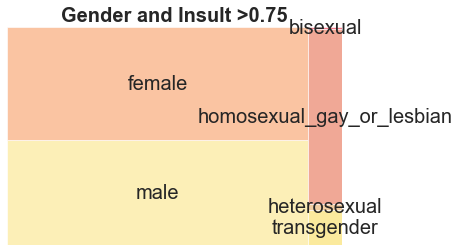

In [30]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= gender_data_insult["values"].values# proportions of the categories
label=gender_data_insult["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})
plt.rcParams["figure.figsize"] = [15,15]
plt.title("Gender and Insult >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

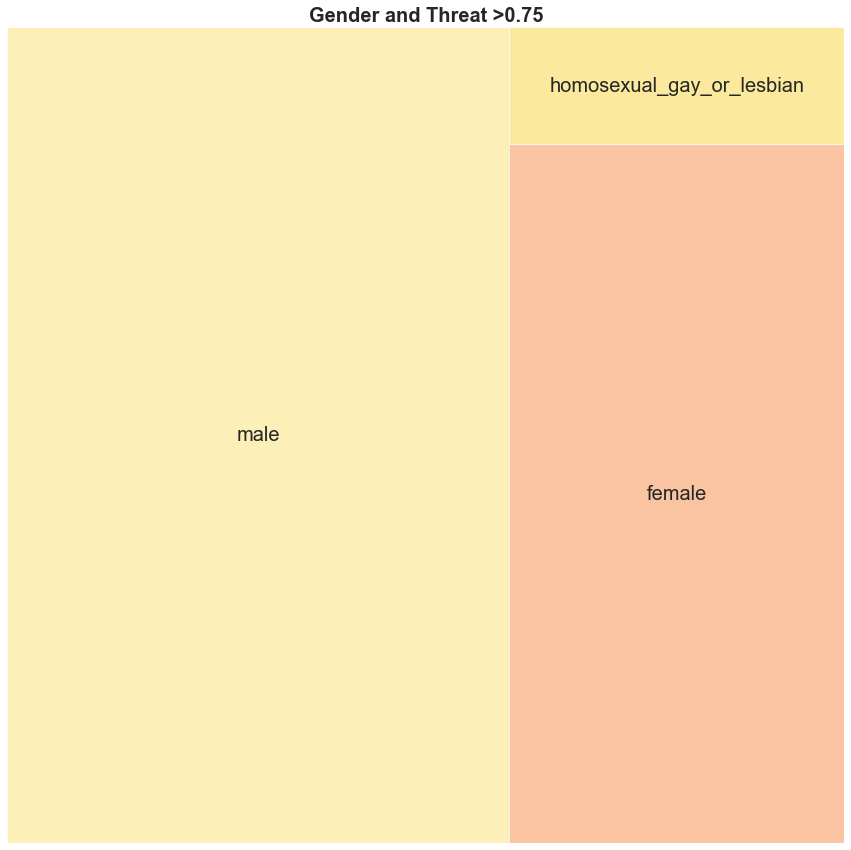

In [31]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= gender_data_threat["values"].values# proportions of the categories
label=gender_data_threat["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})
plt.rcParams["figure.figsize"] = [15,15]
plt.title("Gender and Threat >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

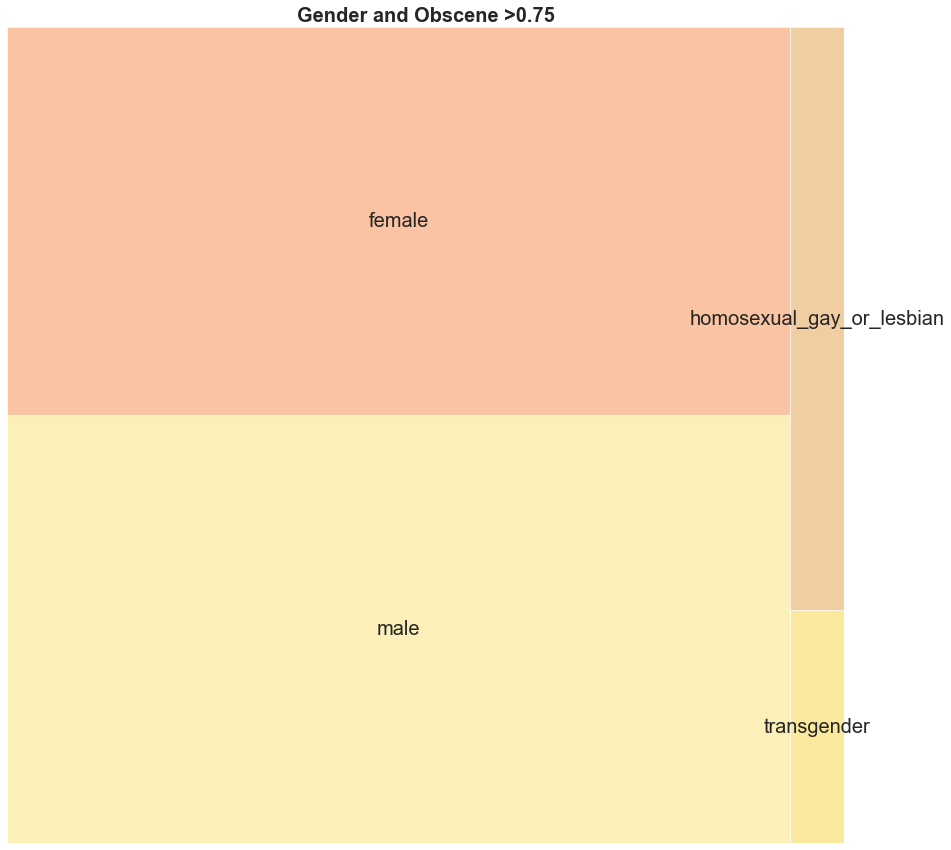

In [32]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= gender_data_obscene["values"].values# proportions of the categories
label=gender_data_obscene["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})
plt.rcParams["figure.figsize"] = [15,15]
plt.title("Gender and Obscene >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

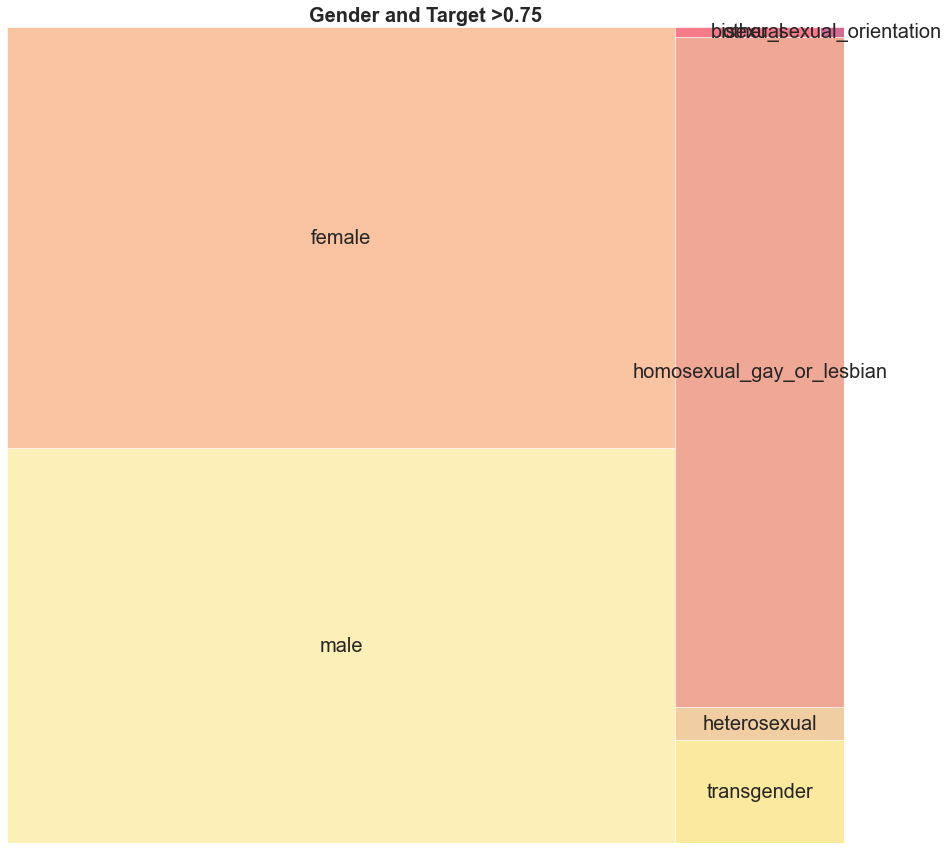

In [33]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= gender_data_target["values"].values# proportions of the categories
label=gender_data_target["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [25,25]
plt.title("Gender and Target >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

In [34]:
label= ["christian", "jewish", "muslim","hindu","atheist", "other_religion"]
values_insult =[]
values_threat =[]
values_obscene =[]
values_target =[]
label_insult =[]
label_threat =[]
label_obscene =[]
label_target =[]
for curr_religion in label:
    counter1 = toxic_train.loc[(toxic_train[curr_religion] > 0.5) & (toxic_train['insult'] > 0.75)]["comment_text"].count()
    counter2 = toxic_train.loc[(toxic_train[curr_religion] > 0.5) & (toxic_train['threat'] > 0.75)]["comment_text"].count()
    counter3 = toxic_train.loc[(toxic_train[curr_religion] > 0.5) & (toxic_train['obscene'] > 0.75)]["comment_text"].count()
    counter4 = toxic_train.loc[(toxic_train[curr_religion] > 0.5) & (toxic_train['target'] > 0.75)]["comment_text"].count()
    if counter1 >0:
        values_insult.append(counter1)
        label_insult.append(curr_religion)
    if counter2>0:
        values_threat.append(counter2)
        label_threat.append(curr_religion)
    if counter3>0:
        values_obscene.append(counter3)
        label_obscene.append(curr_religion)
    if counter4>0:
        values_target.append(counter4)
        label_target.append(curr_religion)
religion_data_insult = pd.DataFrame({"label":label_insult, "values":values_insult})
religion_data_threat = pd.DataFrame({"label":label_threat, "values":values_threat})
religion_data_obscene = pd.DataFrame({"label":label_obscene, "values":values_obscene})
religion_data_target = pd.DataFrame({"label":label_target, "values":values_target})
print(religion_data_insult)
print(religion_data_threat)
print(religion_data_obscene)
print(religion_data_target)

            label  values
0       christian     197
1          jewish      74
2          muslim     246
3           hindu       4
4         atheist      13
5  other_religion       4
       label  values
0  christian       4
1     jewish       4
2     muslim      11
            label  values
0       christian      15
1          jewish       7
2          muslim      13
3           hindu       1
4         atheist       2
5  other_religion       1
            label  values
0       christian     453
1          jewish     214
2          muslim     834
3           hindu       7
4         atheist      29
5  other_religion       5


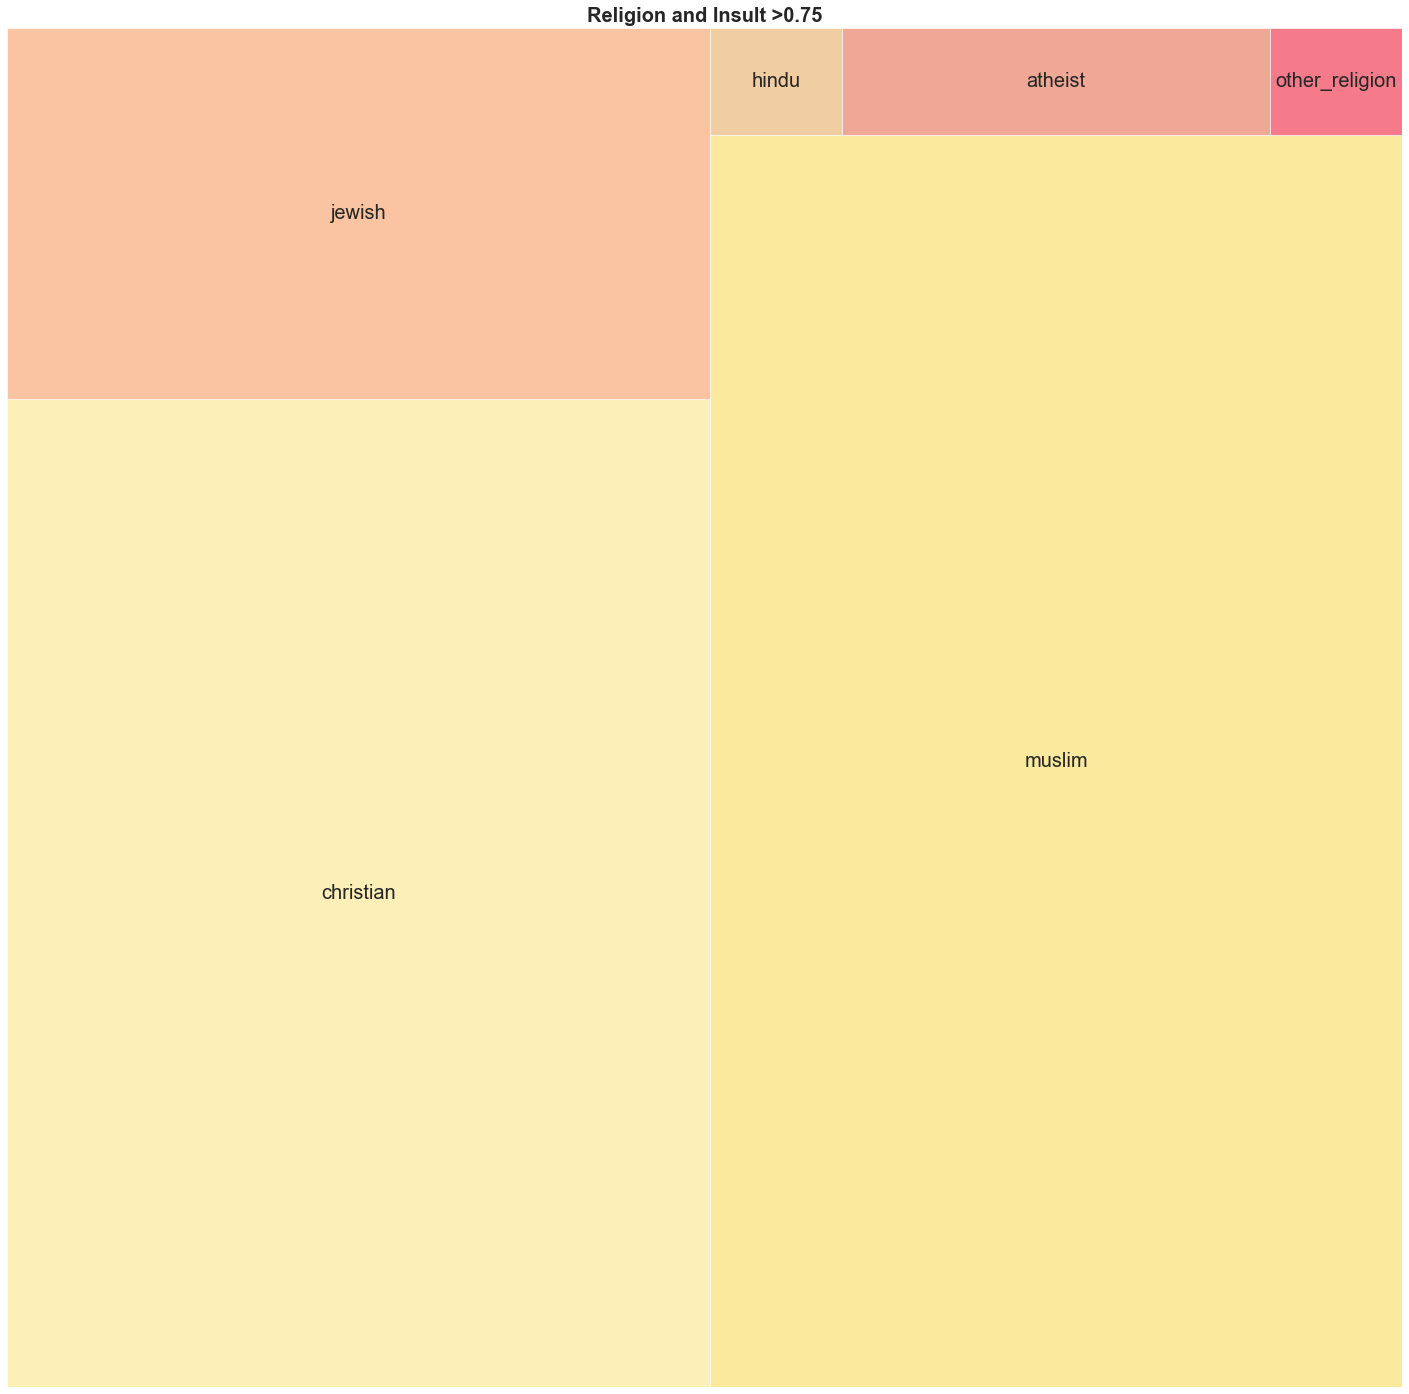

In [35]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= religion_data_insult["values"].values# proportions of the categories
label=religion_data_insult["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Religion and Insult >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

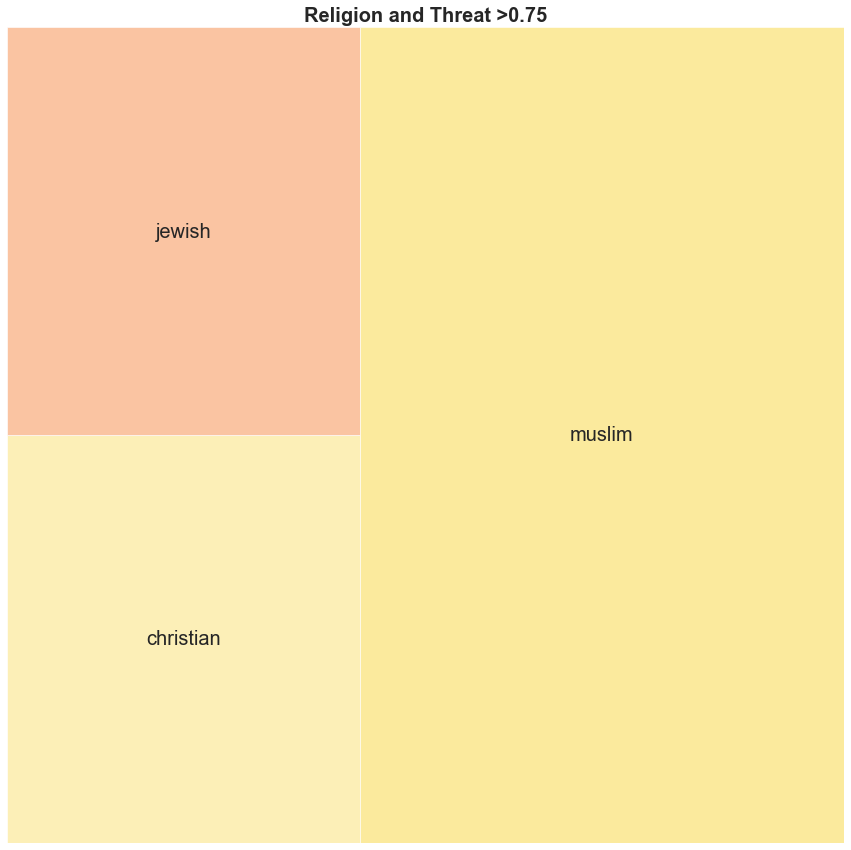

In [36]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= religion_data_threat["values"].values# proportions of the categories
label=religion_data_threat["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Religion and Threat >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

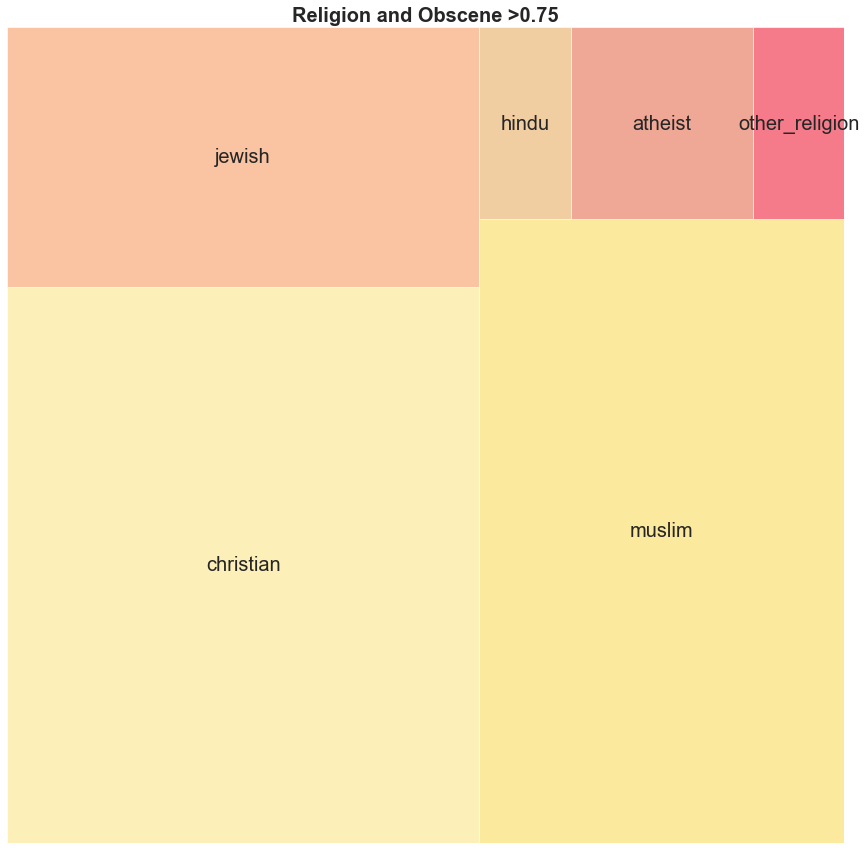

In [37]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= religion_data_obscene["values"].values# proportions of the categories
label=religion_data_obscene["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Religion and Obscene >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

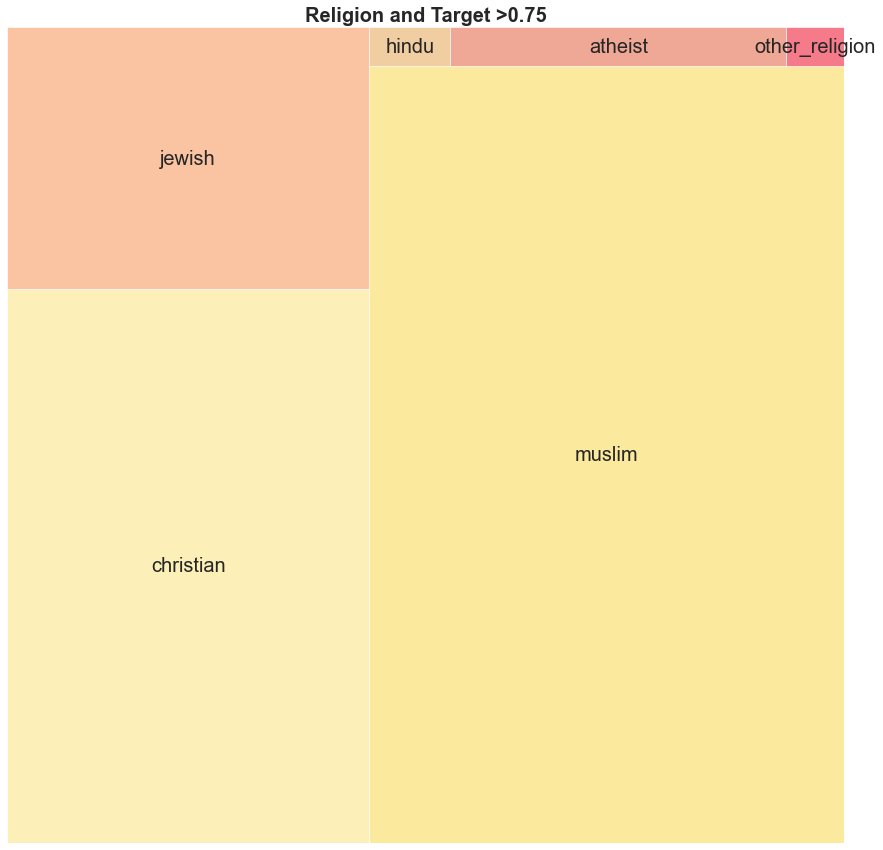

In [38]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= religion_data_target["values"].values# proportions of the categories
label=religion_data_target["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Religion and Target >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

In [39]:
label= ["black", "white", "asian","latino","other_race_or_ethnicity"]
values_insult =[]
values_threat =[]
values_obscene =[]
values_target =[]
label_insult =[]
label_threat =[]
label_obscene =[]
label_target =[]
for curr_race in label:
    counter1 = toxic_train.loc[(toxic_train[curr_race] > 0.5) & (toxic_train['insult'] > 0.75)]["comment_text"].count()
    counter2 = toxic_train.loc[(toxic_train[curr_race] > 0.5) & (toxic_train['threat'] > 0.75)]["comment_text"].count()
    counter3 = toxic_train.loc[(toxic_train[curr_race] > 0.5) & (toxic_train['obscene'] > 0.75)]["comment_text"].count()
    counter4 = toxic_train.loc[(toxic_train[curr_race] > 0.5) & (toxic_train['target'] > 0.75)]["comment_text"].count()
    if counter1 >0:
        values_insult.append(counter1)
        label_insult.append(curr_race)
    if counter2>0:
        values_threat.append(counter2)
        label_threat.append(curr_race)
    if counter3>0:
        values_obscene.append(counter3)
        label_obscene.append(curr_race)
    if counter4>0:
        values_target.append(counter4)
        label_target.append(curr_race)
race_data_insult = pd.DataFrame({"label":label_insult, "values":values_insult})
race_data_threat = pd.DataFrame({"label":label_threat, "values":values_threat})
race_data_obscene = pd.DataFrame({"label":label_obscene, "values":values_obscene})
race_data_target = pd.DataFrame({"label":label_target, "values":values_target})
print(race_data_insult)
print(race_data_threat)
print(race_data_obscene)
print(race_data_target)

                     label  values
0                    black     249
1                    white     450
2                    asian      36
3                   latino      22
4  other_race_or_ethnicity       5
   label  values
0  black       4
1  white      13
2  asian       1
    label  values
0   black      19
1   white      23
2   asian       3
3  latino       2
                     label  values
0                    black     784
1                    white    1083
2                    asian      78
3                   latino      43
4  other_race_or_ethnicity       7


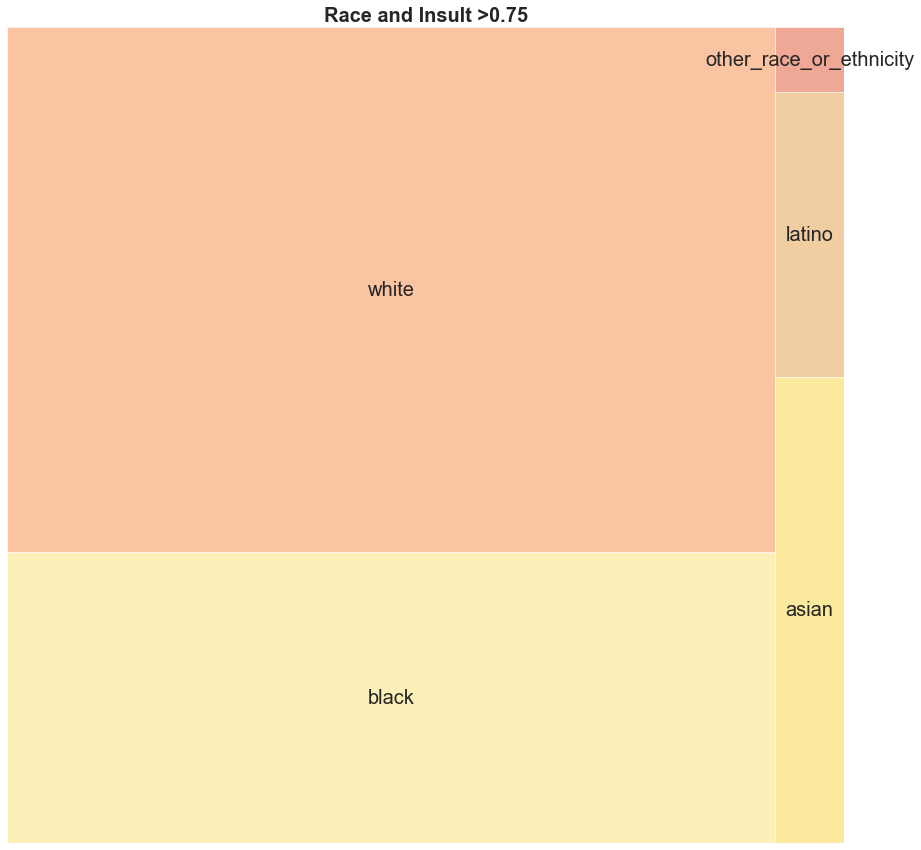

In [40]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= race_data_insult["values"].values# proportions of the categories
label=race_data_insult["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Race and Insult >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

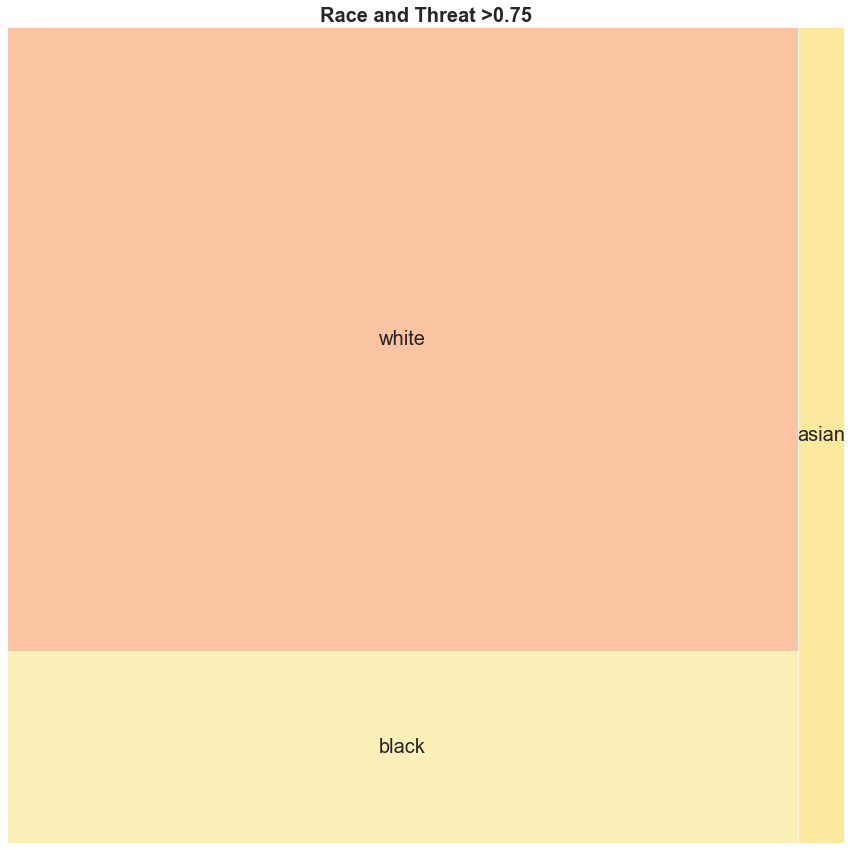

In [41]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= race_data_threat["values"].values# proportions of the categories
label=race_data_threat["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Race and Threat >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

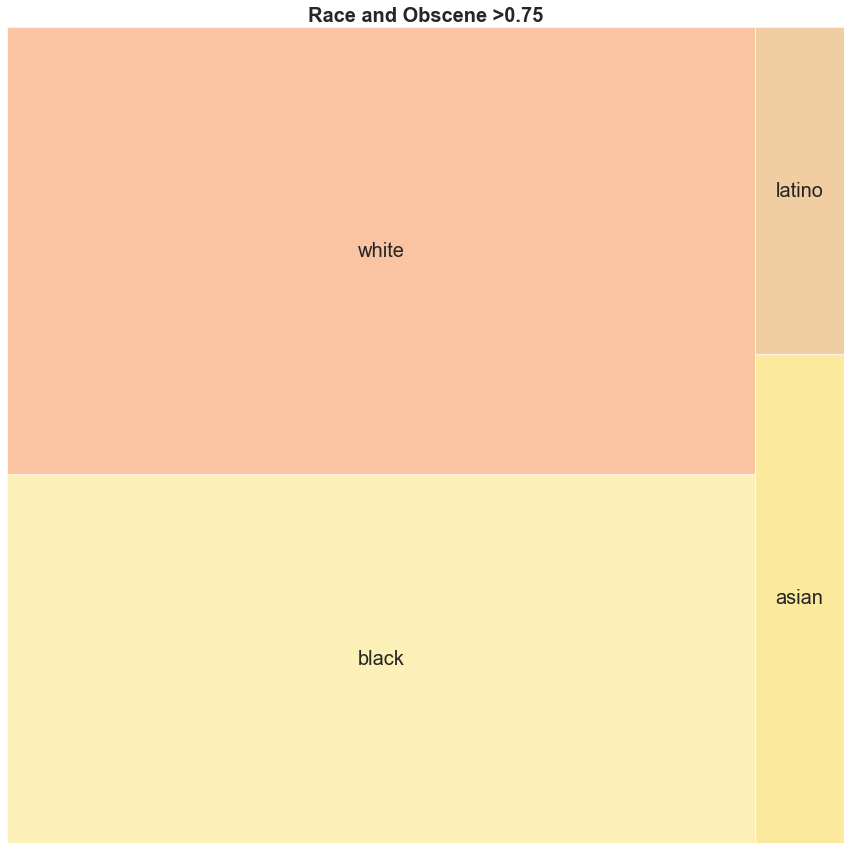

In [42]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= race_data_obscene["values"].values# proportions of the categories
label=race_data_obscene["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Race and Obscene >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

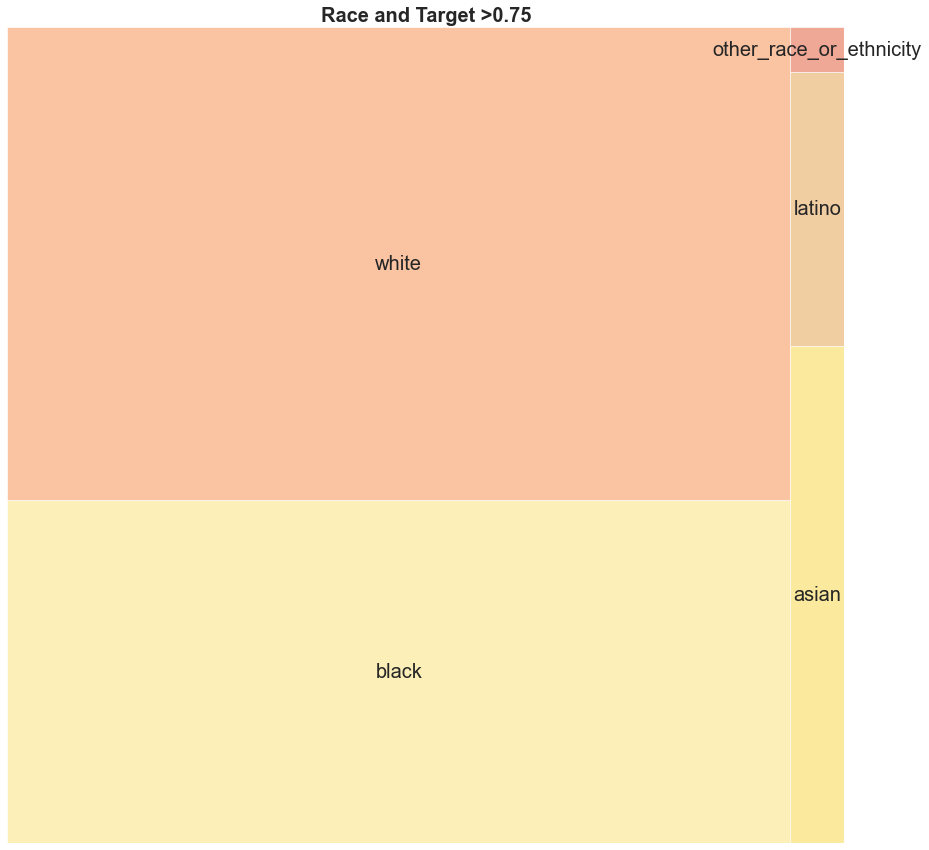

In [43]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= race_data_target["values"].values# proportions of the categories
label=race_data_target["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Race and Target >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

# Data Pre-Processing & Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

In [45]:
toxic_train['comment_text'] = toxic_train['comment_text'].astype(str)
toxic_test['comment_text'] = toxic_test['comment_text'].astype(str)
shortlisted_identity_columns = ['male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
    'muslim', 'black', 'white', 'psychiatric_or_mental_illness']

In [46]:
# convert target and identity columns to boolean

for column in shortlisted_identity_columns + ["target"]:
    toxic_train[column] = np.where(toxic_train[column] >= 0.5, True, False)
    
toxic_train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,False,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,False,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,False,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,False,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,True,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [47]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import nltk
import re

# nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocesstext(text):
    text = text.lower() # convert everything to lower case first
    text = re.sub('[^A-Za-z0-9]+', ' ', text) # Removes special characters and punctuations
    words = word_tokenize(text)
    words_without_stopwords = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    text = " ".join(words_without_stopwords)
    return text

In [ ]:
# toxic_train["preprocessed_text"] = toxic_train["comment_text"].apply(preprocesstext)
# toxic_test["preprocessed_text"] = toxic_test["comment_text"].apply(preprocesstext)

In [ ]:
# Saving the files so that there's no need to preprocess again (takes ~ 20 mins to do so)

# toxic_train.to_pickle('toxic_train_preprocessed.pkl')
# toxic_test.to_pickle('toxic_test_preprocessed.pkl')

In [2]:
# Load the csv files

toxic_train = pd.read_pickle("toxic_train_preprocessed.pkl")
toxic_test = pd.read_pickle("toxic_test_preprocessed.pkl")

In [49]:
toxic_train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,preprocessed_text
0,59848,False,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,cool like would want mother read really great ...
1,59849,False,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,thank would make life lot le anxiety inducing ...
2,59852,False,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,urgent design problem kudos taking impressive
3,59855,False,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,something able install site releasing
4,59856,True,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.0,4,47,haha guy bunch loser


In [50]:
toxic_test.head()

,id,comment_text,preprocessed_text
0,7097320,[ Integrity means that you pay your debts.]\n\...,integrity mean pay debt apply president trump
1,7097321,This is malfeasance by the Administrator and t...,malfeasance administrator board wasting money
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...,rmiller101 spoken like true elitist look bud a...
3,7097323,"Paul: Thank you for your kind words. I do, in...",paul thank kind word indeed strong belief hide...
4,7097324,Sorry you missed high school. Eisenhower sent ...,sorry missed high school eisenhower sent troop...


In [51]:
X = toxic_train[["preprocessed_text"]]
y = toxic_train[["target"]]
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
X_train.head()

,preprocessed_text
1578194,smart good advisor rest u middle class loser
1436268,insert congress govt employee participate plan...
231621,look like one claim debunked http www subjectp...
851179,spare u hyperbole inaccuracy offering reached ...
787901,dai facing ramification previous administratio...


In [53]:
X_test = toxic_test[["preprocessed_text"]]
X_test.head()

,preprocessed_text
0,integrity mean pay debt apply president trump
1,malfeasance administrator board wasting money
2,rmiller101 spoken like true elitist look bud a...
3,paul thank kind word indeed strong belief hide...
4,sorry missed high school eisenhower sent troop...


In [ ]:
# tfidf_vec = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
# tfidf_train = tfidf_vec.fit_transform(X_train['preprocessed_text'])
# tfidf_cv = tfidf_vec.transform(X_cv['preprocessed_text'])
# tfidf_test = tfidf_vec.transform(X_test['preprocessed_text'])

In [ ]:
# Saving the files so that there's no need to preprocess again (takes ~ 10 mins to do so)

# sparse.save_npz('tfidf_train.npz', tfidf_train)
# sparse.save_npz('tfidf_cv.npz', tfidf_cv)
# sparse.save_npz('tfidf_test.npz', tfidf_test)

In [54]:
# load the npz tfidf files

tfidf_train = sparse.load_npz('tfidf_train.npz')
tfidf_cv = sparse.load_npz('tfidf_cv.npz')
tfidf_test = sparse.load_npz('tfidf_test.npz')

In [ ]:
# to address imbalance

# oversample = SMOTE()
# X_train_balanced, y_train_balanced = oversample.fit_resample(tfidf_train, y_train)
# X_cv_balanced, y_cv_balanced = oversample.fit_resample(tfidf_cv, y_cv)

In [ ]:
# Saving the files so that there's no need to preprocess again (takes ~ 15 mins to do so)

# sparse.save_npz('X_train_balanced.npz', X_train_balanced)
# sparse.save_npz('X_cv_balanced.npz', X_cv_balanced)

In [ ]:
# y_train_balanced.to_pickle('y_train_balanced.pkl')
# y_cv_balanced.to_pickle('y_cv_balanced.pkl')

In [55]:
X_train_balanced = sparse.load_npz('X_train_balanced.npz')
y_train_balanced = pd.read_pickle('y_train_balanced.pkl')
X_cv_balanced = sparse.load_npz('X_cv_balanced.npz')
y_cv_balanced = pd.read_pickle('y_cv_balanced.pkl')

In [56]:
y_train_balanced.value_counts()

target
True      1162706
False     1162706
dtype: int64

In [57]:
y_cv_balanced.value_counts()

target
True      497834
False     497834
dtype: int64

# Classification Models

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

**Logistic Regression**

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logreg = LogisticRegression(C=5, random_state=42, solver='sag', max_iter=1000, n_jobs=-1)
logreg.fit(X_train_balanced, y_train_balanced.values.ravel())

LogisticRegression(C=5, max_iter=1000, n_jobs=-1, random_state=42, solver='sag')

In [62]:
y_pred = logreg.predict(X_cv_balanced)

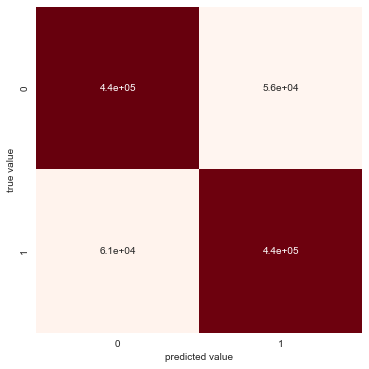

In [63]:
plt.figure(figsize=(8, 6))
mat = confusion_matrix(y_cv_balanced, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Reds')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [64]:
print(classification_report(y_cv_balanced, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.89      0.88    497834
        True       0.89      0.88      0.88    497834

    accuracy                           0.88    995668
   macro avg       0.88      0.88      0.88    995668
weighted avg       0.88      0.88      0.88    995668



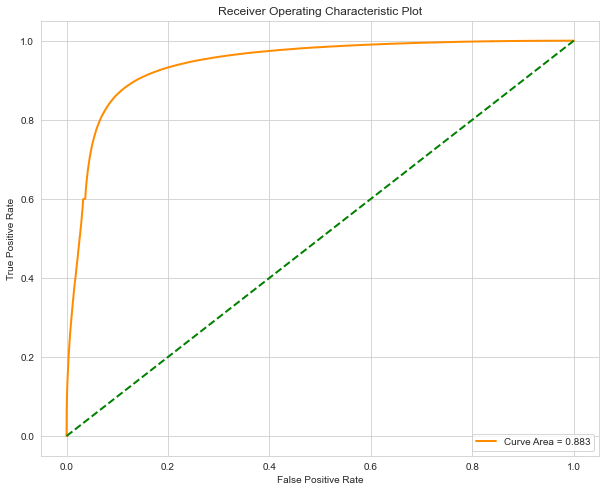

In [65]:
fpr, tpr, thr = roc_curve(y_cv_balanced, logreg.predict_proba(X_cv_balanced)[:,1])
auc = roc_auc_score(y_cv_balanced, y_pred)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
plt.legend(loc="lower right")
plt.show()

# LDA (Topic Modelling)

In [3]:
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [4]:
def lda_preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 2:
            result.append(token)
    return result

In [5]:
lda_preprocessed_comments = toxic_train['preprocessed_text'].sample(200000, random_state=42).map(lda_preprocess)
lda_preprocessed_comments.sample(3)

1622814              [google, taco, bell, stand, repurposed]
128157     [build, brand, course, actually, expected, win...
1441771          [interesting, people, time, following, law]
Name: preprocessed_text, dtype: object

In [6]:
dictionary = corpora.Dictionary(lda_preprocessed_comments)
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=75000)

In [7]:
bow_corpus = [dictionary.doc2bow(doc) for doc in lda_preprocessed_comments]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [8]:
# lda_model = models.LdaMulticore(corpus_tfidf, num_topics=20,
#                                     id2word=dictionary, passes=2, workers=2)

In [9]:
# save model because it takes (~ 5 mins) to train

# lda_model.save("lda_model.model")

In [8]:
lda_model = models.LdaMulticore.load("lda_model.model")

In [9]:
# represent the first 10 topics with 5 words each

topics = lda_model.print_topics(num_words=5)
for i, topic in enumerate(topics[:10]):
    print("Train topic {}: {}".format(i, topic))

Train topic 0: (0, '0.011*"church" + 0.007*"catholic" + 0.006*"yes" + 0.005*"priest" + 0.004*"bishop"')
Train topic 1: (1, '0.010*"gun" + 0.005*"china" + 0.005*"north" + 0.005*"korea" + 0.004*"weapon"')
Train topic 2: (2, '0.009*"right" + 0.008*"white" + 0.007*"woman" + 0.006*"law" + 0.006*"racist"')
Train topic 3: (3, '0.014*"tax" + 0.008*"money" + 0.008*"pay" + 0.006*"year" + 0.006*"state"')
Train topic 4: (4, '0.009*"game" + 0.008*"team" + 0.006*"player" + 0.005*"like" + 0.005*"thank"')
Train topic 5: (5, '0.004*"stock" + 0.003*"dividend" + 0.003*"year" + 0.003*"like" + 0.003*"time"')
Train topic 6: (6, '0.008*"said" + 0.006*"awesome" + 0.005*"liar" + 0.005*"funny" + 0.005*"dad"')
Train topic 7: (7, '0.005*"abortion" + 0.004*"blah" + 0.004*"uncivil" + 0.004*"fascism" + 0.003*"tweet"')
Train topic 8: (8, '0.008*"thanks" + 0.006*"know" + 0.005*"excellent" + 0.005*"post" + 0.005*"sarcasm"')
Train topic 9: (9, '0.006*"russia" + 0.006*"war" + 0.006*"trudeau" + 0.005*"terrorist" + 0.005*"

In [10]:
# predict the type of topic for document (index 5)

bd5 = bow_corpus[5]
for i in range(len(bd5)):
    print("Word {} (\"{}\") appears {} time.".format(bd5[i][0], dictionary[bd5[i][0]],bd5[i][1]))

Word 65 ("money") appears 1 time.
Word 76 ("mouth") appears 1 time.
Word 83 ("buy") appears 1 time.
Word 84 ("care") appears 1 time.
Word 85 ("thing") appears 1 time.
Word 86 ("thought") appears 1 time.


In [11]:
for index, score in sorted(lda_model[bd5], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 5)))


Score: 0.6230024695396423	 
Topic: 0.014*"tax" + 0.008*"money" + 0.008*"pay" + 0.006*"year" + 0.006*"state"

Score: 0.2484104037284851	 
Topic: 0.007*"agree" + 0.006*"idiot" + 0.005*"justin" + 0.005*"dumb" + 0.005*"loser"


In [12]:
# the lower the better
print('Perplexity: ', round(lda_model.log_perplexity(bow_corpus), 2))

# the higher the better
coherence_model_lda = models.CoherenceModel(model=lda_model, texts=lda_preprocessed_comments, 
                                     dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.13

Coherence Score:  0.49846528613988345


In [12]:
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)

C:\Users\DVH\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [13]:
lda_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.150078 -0.078859       1        1  14.782678
2     -0.052938  0.102073       2        1   8.283291
11    -0.023833  0.109226       3        1   7.732021
10    -0.016089  0.066821       4        1   7.674764
15    -0.139111 -0.022486       5        1   7.602219
19    -0.028839  0.129770       6        1   6.496881
12    -0.078550  0.034196       7        1   6.096011
1     -0.063768 -0.063896       8        1   4.807516
17    -0.024058 -0.160132       9        1   4.486025
0     -0.031330  0.039898      10        1   4.317512
4      0.038785  0.048650      11        1   3.825081
5     -0.043884 -0.078510      12        1   3.680090
9     -0.014027  0.113656      13        1   3.654818
18    -0.011991 -0.007510      14        1   3.228972
8      0.067206 -0.105037      15        1   2.712980
13     0.062494 -0.033243      16        1   2.651292
16    -0.047074 -0.049097      17        1   2.648858
6      0.151014 -0.144785      18        1   1.808491
7      0.166169  0.068917      19        1   1.774160
14     0.239900  0.030348      20        1   1.736339, topic_info=        Term          Freq         Total Category  logprob  loglift
886     http   4140.000000   4140.000000  Default  30.0000  30.0000
883      com   3432.000000   3432.000000  Default  29.0000  29.0000
70       tax  11119.000000  11119.000000  Default  28.0000  28.0000
892      www   3098.000000   3098.000000  Default  27.0000  27.0000
757   church   3502.000000   3502.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
73   comment    227.028280   6998.353371  Topic20  -5.8178   0.6250
231      got    219.384078   5143.861585  Topic20  -5.8520   0.8987
496     left    213.587580   4711.041530  Topic20  -5.8788   0.9598
230     good    210.550697  10464.894599  Topic20  -5.8931   0.1473
880     post    208.147671   4770.748170  Topic20  -5.9046   0.9214

[1620 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
1741       1  0.000858   abortion
1741       2  0.254740   abortion
1741       4  0.010293   abortion
1741       5  0.004289   abortion
1741       6  0.138949   abortion
...      ...       ...        ...
12226      2  0.967909  zoolander
7806       2  0.022828       zuma
7806       3  0.923503       zuma
7806       5  0.010376       zuma
7806       7  0.033205       zuma

[8772 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 12, 11, 16, 20, 13, 2, 18, 1, 5, 6, 10, 19, 9, 14, 17, 7, 8, 15])